# Experiment Cluster Metrics

The 50 Pandas Dataframes below capture the following metrics for each of the 50 lattice machines in the cluster in the duration on the experiment:

- Timestamp
- CPU Usage: User Percent
- CPU Usage: System Percent
- Memory Total
- Memory Active
- Memory Inactive
- Network: eno1 Writes in KB/s
- Network: eno1 Reads in KB/s
- Network: eno2 Writes in KB/s
- Network: eno2 Reads in KB/s
- Disk Reads: sda
- Disk Reads: sdb
- Disk Reads: sdc
- Disk Reads: sdd
- Disk Writes: sda
- Disk Writes: sdb
- Disk Writes: sdc
- Disk Writes: sdd

In [164]:
# NOTEBOOK VARIABLES

experiment = "non-tl-sequential"
cluster_metric = "MEM:active" # See dataframe for column titles

yticks = {
    "CPU_ALL:Total": range(0,101,25),             # 0 to 100 percent
    "MEM:active": range(0,64001,8000),            # 0 to 64GB
    "NET:eno1-write-KB/s": range(0,20001,2000),   # 0 to 20MBps
    "NET:eno1-read-KB/s": range(0,20001,2000),    # 0 to 20MBps
    "DISKWRITE:sda": range(0,100001,10000),       # 0 to 100MBps
    "DISKREAD:sda": range(0,100001,10000)
}

ylims = {
    "CPU_ALL:Total": [0,100],
    "MEM:active": [0,64000],
    "NET:eno1-write-KB/s": [0,20000],
    "NET:eno1-read-KB/s": [0,20000],
    "DISKWRITE:sda": [0,100000],
    "DISKREAD:sda": [0,100000]
}

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [166]:
def hostname_to_ip(machine_name):
    parts = machine_name.split("-")
    if parts[0] == "lattice":
        number = int(parts[1])
        base = number + 10 # starts at lattice-100 : 129.82.208.110
        return "129.82.208." + str(base)
    else:
        print("Invalid hostname: ", machine_name)
        return None
        

In [167]:
dir_prefix_no_tl = f"experiment_data/cluster_metrics/{experiment}"
machines_files = [(f"lattice-{i}", str(i-100)+"-"+hostname_to_ip(f"lattice-{i}")+".nmon.csv") for i in range(100, 150)]
machines_dfs = [{},{}]
for machine_entry in machines_files:
    machines_dfs[0][machine_entry[0]] = pd.read_csv(f"experiment_data/cluster_metrics/non-tl-sequential/{machine_entry[1]}", header=0)
    machines_dfs[1][machine_entry[0]] = pd.read_csv(f"experiment_data/cluster_metrics/tl-sequential/{machine_entry[1]}", header=0)
    machines_dfs[0][machine_entry[0]]["CPU_ALL:Total"] = machines_dfs[0][machine_entry[0]]["CPU_ALL:User%"] + machines_dfs[0][machine_entry[0]]["CPU_ALL:Sys%"]
    machines_dfs[1][machine_entry[0]]["CPU_ALL:Total"] = machines_dfs[1][machine_entry[0]]["CPU_ALL:User%"] + machines_dfs[1][machine_entry[0]]["CPU_ALL:Sys%"]

machines_dfs[1]["lattice-100"]

print(machines_dfs[1]["lattice-109"]["CPU_ALL:Total"].mean())

3.9588495032503386


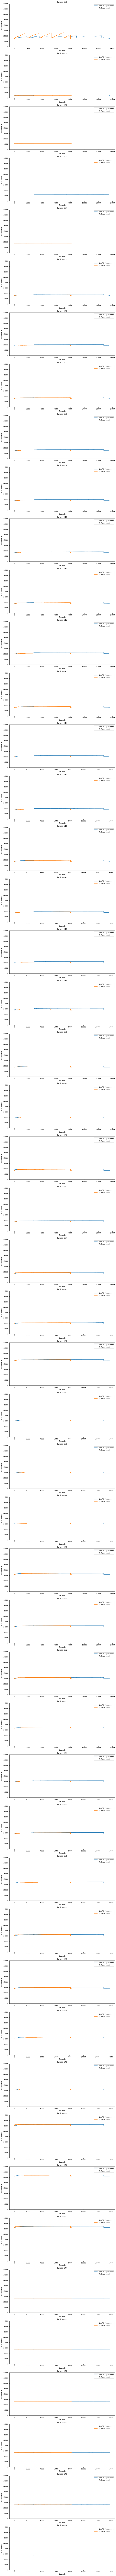

In [168]:
# ---- NMON Profiling ----

# Create a figure
figure, axis = plt.subplots(len(machines_dfs[0]), 1, figsize=(12,300))

for i, hostname in enumerate(machines_dfs[0].keys()):
    no_tl_df = machines_dfs[0][hostname]
    tl_df = machines_dfs[1][hostname]

    axis[i].set_yticks(yticks[cluster_metric])
    axis[i].set_ylim(ylims[cluster_metric])
    axis[i].plot(no_tl_df[cluster_metric].to_list(), label="Non-TL Experiment")
    axis[i].plot(tl_df[cluster_metric].to_list(), label="TL Experiment")
    axis[i].plot()
    axis[i].set_xlabel("Seconds")
    axis[i].set_ylabel(cluster_metric)
    axis[i].set_title(hostname)
    axis[i].legend()


# show plot
plt.show()

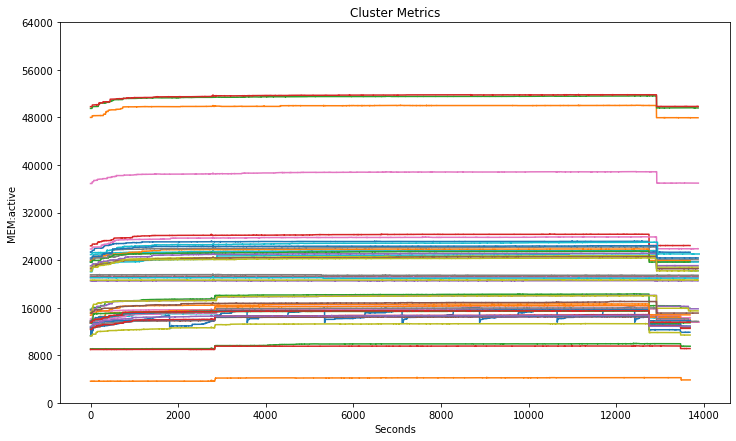

In [171]:
plt.figure(figsize=(12,7))

plt.yticks(yticks[cluster_metric])
plt.ylim(ylims[cluster_metric])

for i, hostname in enumerate(machines_dfs[0].keys()):
    
    df = machines_dfs[0][hostname]
    data_list = df[cluster_metric].to_list()
    plt.plot(data_list, label=cluster_metric)
    
    
plt.xlabel("Seconds")
plt.ylabel(cluster_metric)
plt.title("Cluster Metrics")

plt.show()